# Assignment 03

Dear Team,

I hope you are doing GREAT!

The following assignment is divided in two parts:
- Part A: Please, run the pre-coded cells to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 01 and 02
- Part B: Please, run the pre-coded cells to train the given Neural Network and then respond to the questions 03 to 10

The idea of the current assignment is to intensify what we have learned about Convolutional Neural Networks (chapter 5 of the *Deep Learning With Python* book).

There are some new concepts and challenges that we will face in the current assignment, and we need to resolve each issue and move to the next step.

The assignment is easy to follow yet needs the patience to solve each question at a time.

**Note:**

Please note that every question has 0.5 and it provides five out of total ten marks for the assignment.

The video presentation, as you have done for previous assignments, provides the rest of the mark, which is 5.

In short, 5 for coding + 5 for the video presentation = 10, but without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [ ]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [ ]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [ ]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [ ]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




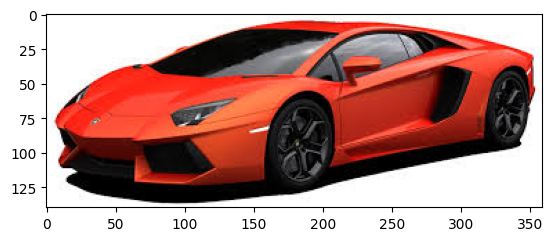

In [ ]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [ ]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


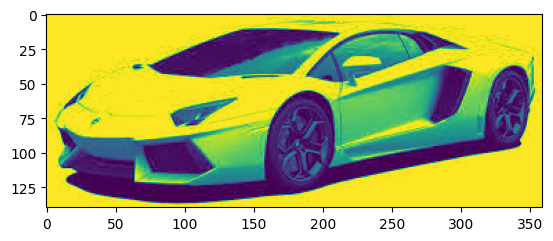

In [ ]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

In [ ]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [ ]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [ ]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [ ]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

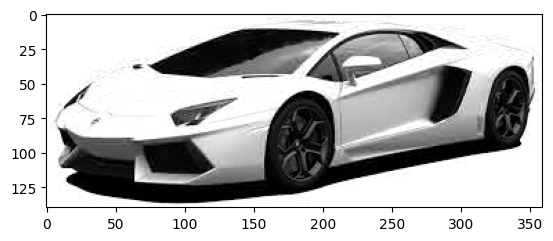

In [ ]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [ ]:
# Define a function to squash out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [ ]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

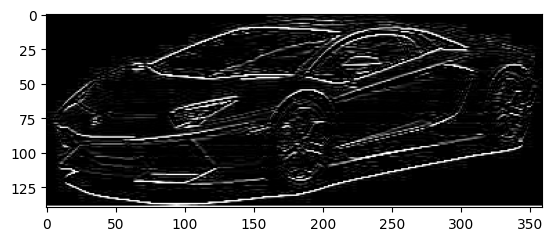

In [ ]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

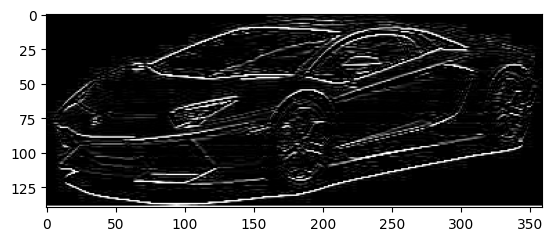

In [ ]:
# Type your code here

#Create a kernel to detect 45 degree lines
fortyFive = np.array(
    [[-1, -1, -1],
     [2, 2, 2],
     [-1, -1, -1]
     ])

#Apply the kernel to the image
transf_diagonal = conv_2d_kernel(input_img_arr, kernel = fortyFive)

#Plot the resulting image
plt.imshow(transf_diagonal, cmap = plt.get_cmap('gray'))


#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

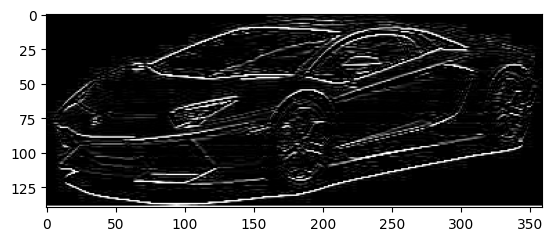

In [ ]:
# Type your code here

oneThirtyFive = np.array([
     [-1, -1, -1],
     [2, 2, 2],
     [-1, -1, -1]
    ])
#Apply the kernel to the image
transf_diagonal = conv_2d_kernel(input_img_arr, kernel = oneThirtyFive)

#Plot the resulting image
plt.imshow(transf_diagonal, cmap = plt.get_cmap('gray'))

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [ ]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

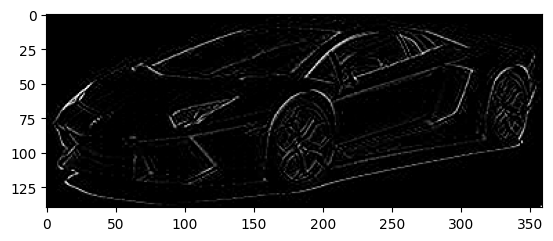

In [ ]:
# Type your code here

#Apply the kernel to the image
transf_diagonal = conv_2d_kernel(input_img_arr, kernel = edge_kernel_1)

#Plot the resulting image
plt.imshow(transf_diagonal, cmap = plt.get_cmap('gray'))

#### 02-b:

In [ ]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

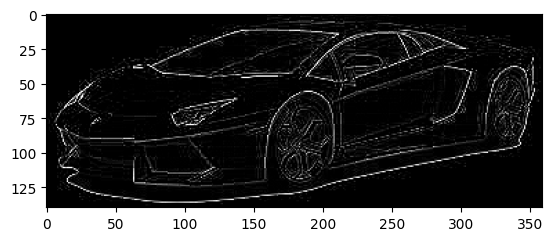

In [ ]:
# Type your code here

#Apply the kernel to the image
transf_diagonal = conv_2d_kernel(input_img_arr, kernel = edge_kernel_2)

#Plot the resulting image
plt.imshow(transf_diagonal, cmap = plt.get_cmap('gray'))

#### 02-c:

In [ ]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

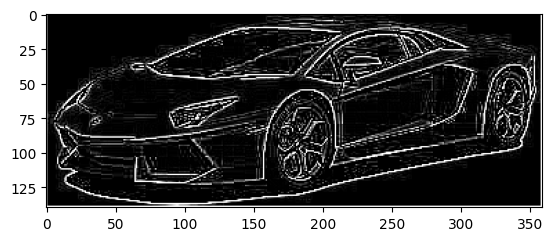

In [ ]:
# Type your code here

#Apply the kernel to the image
transf_diagonal = conv_2d_kernel(input_img_arr, kernel = edge_kernel_3)

#Plot the resulting image
plt.imshow(transf_diagonal, cmap = plt.get_cmap('gray'))


# PART B

## Importing Libraries

In [ ]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [ ]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
______________________________________________

## CustomCallback class for logging

In [ ]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [ ]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [ ]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4100399911403656
Accuracy reached val is 0.5042999982833862

 Finished epoch # 5
Accuracy resched train is 0.6619399785995483
Accuracy reached val is 0.6273999810218811

 Finished epoch # 10
Accuracy resched train is 0.724560022354126
Accuracy reached val is 0.6481999754905701

 Finished epoch # 15
Accuracy resched train is 0.767520010471344
Accuracy reached val is 0.6600000262260437

 Finished epoch # 20
Accuracy resched train is 0.806439995765686
Accuracy reached val is 0.6596999764442444

 Finished epoch # 25
Accuracy resched train is 0.8410999774932861
Accuracy reached val is 0.6606000065803528

 Finished epoch # 30
Accuracy resched train is 0.8741199970245361
Accuracy reached val is 0.6545000076293945

 Finished epoch # 35
Accuracy resched train is 0.9103599786758423
Accuracy reached val is 0.6534000039100647

 Finished epoch # 40
Accuracy resched train is 0.9284600019454956
Accuracy reached val is 0.6438999772071838

 Finished epoch

## Plotting the Results

In [ ]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

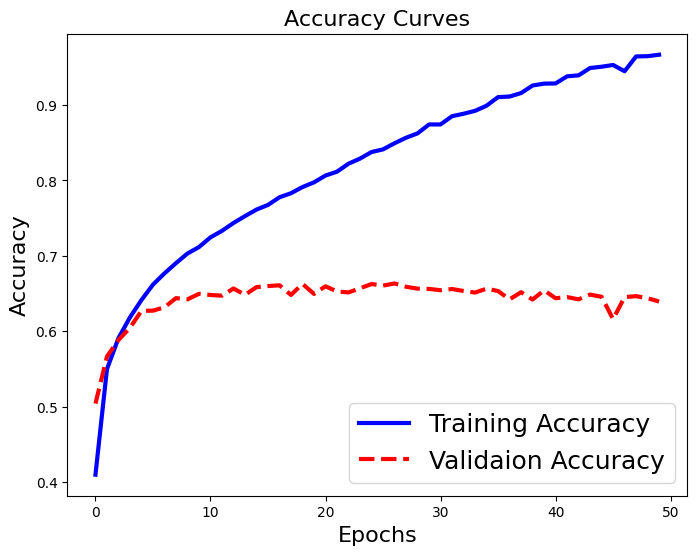

In [ ]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network presented signs of overfitting? If so, in which epoch?



Answer: [Double click to type]

# at around 10

#### 04: Write down how many layers this model has and identify their types

Answer: [Double click to type]
# There are 5 layers :

- conv2d (Conv2D)
- max_pooling2d (MaxPooling2D)
- flatten (Flatten)
- dense (Dense)
- dense_1 (Dense)

#### 05: Briefly explain what is the purpose of each of those layers

Answer: [Double click to type]

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
# Type your code here

# Create the model ## MODEL
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])


In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results and describe what are the differences between them.

Answer: [Double click to type]

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function




In [ ]:
# Type your code here


In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works.

Answer: [Double click to type]

#### 10: Make any other modification in the hyperparameters to improve the model's accuracy and compare the final result with the previous one.
> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
# Type your answer here


In [ ]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

---
# Deliverables:
1. Please, submit the current ipynb file with your responses.
2. Please record and upload to YouTube a 5 to 10 minutes video recorded clip, describing all you have done. If you go beyond 10 minutes, it is fine. The mentioned time range is to show how the scale of the assignment could be.  

Notes:
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a TEXT SUBMISSION SECTION on your BLACKBOARD SUBMISSION. Omitting this BB comment will result in a 0% for your total mark.

- To get the 5% of the (coding) mark, you need to submit a YouTube video that scrolls through your code, explaining every single line of your code.

Then submit the link to the uploaded YouTube video in the **Text Submision section** (see image below).  

![image.png](https://i.ibb.co/gjW5wYC/bb-submission-instructions.png)


**Summary:**

In short, what we need to submit are:

a)	The current **ipynb file** that contains all the code (5 marks).

b)	The **YouTube link** of your recorded video in the **Text Submission section** (5 marks).

Zero for submissions, without YouTube video explanation.


All my best,

Reza
